In [1]:
#Importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import math
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
import heapq
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from numpy import set_printoptions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, roc_auc_score, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [8]:
data=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [9]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
print(data.shape)

(253680, 22)


In [11]:
list(data.columns)

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [12]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### For Handling the Outliers: We will be using Turkey's Method for filtering out the outliers!

In [13]:
# Turkey method for Handling the Outliers:
def turkey_method(df,col_name):
  q1=df[col_name].quantile(0.75)
  q3=df[col_name].quantile(0.25)
  IQR=q3-q1
  min_value=q3+1.5*IQR
  max_value=q1-1.5*IQR
  print(max_value)
  print(min_value)
  return df[(df[col_name]<max_value)&(df[col_name]>min_value)]

In [14]:
# Performing the Turkey Method for "BMI column":
data=turkey_method(data,'BMI')

41.5
13.5


In [15]:
data.shape

(243833, 22)

In [16]:
target='HeartDiseaseorAttack'

In [17]:
set(data['Sex'])

{0.0, 1.0}

In [18]:
def helper(col):
  """
  This helper function takes a column as an input, and returns the number of distinct elements present in that column.
  """
  return len(set(data[col]))

#### Plotting the Difference with the Target Variable and all the other features that are selected for model analysis and predictions:

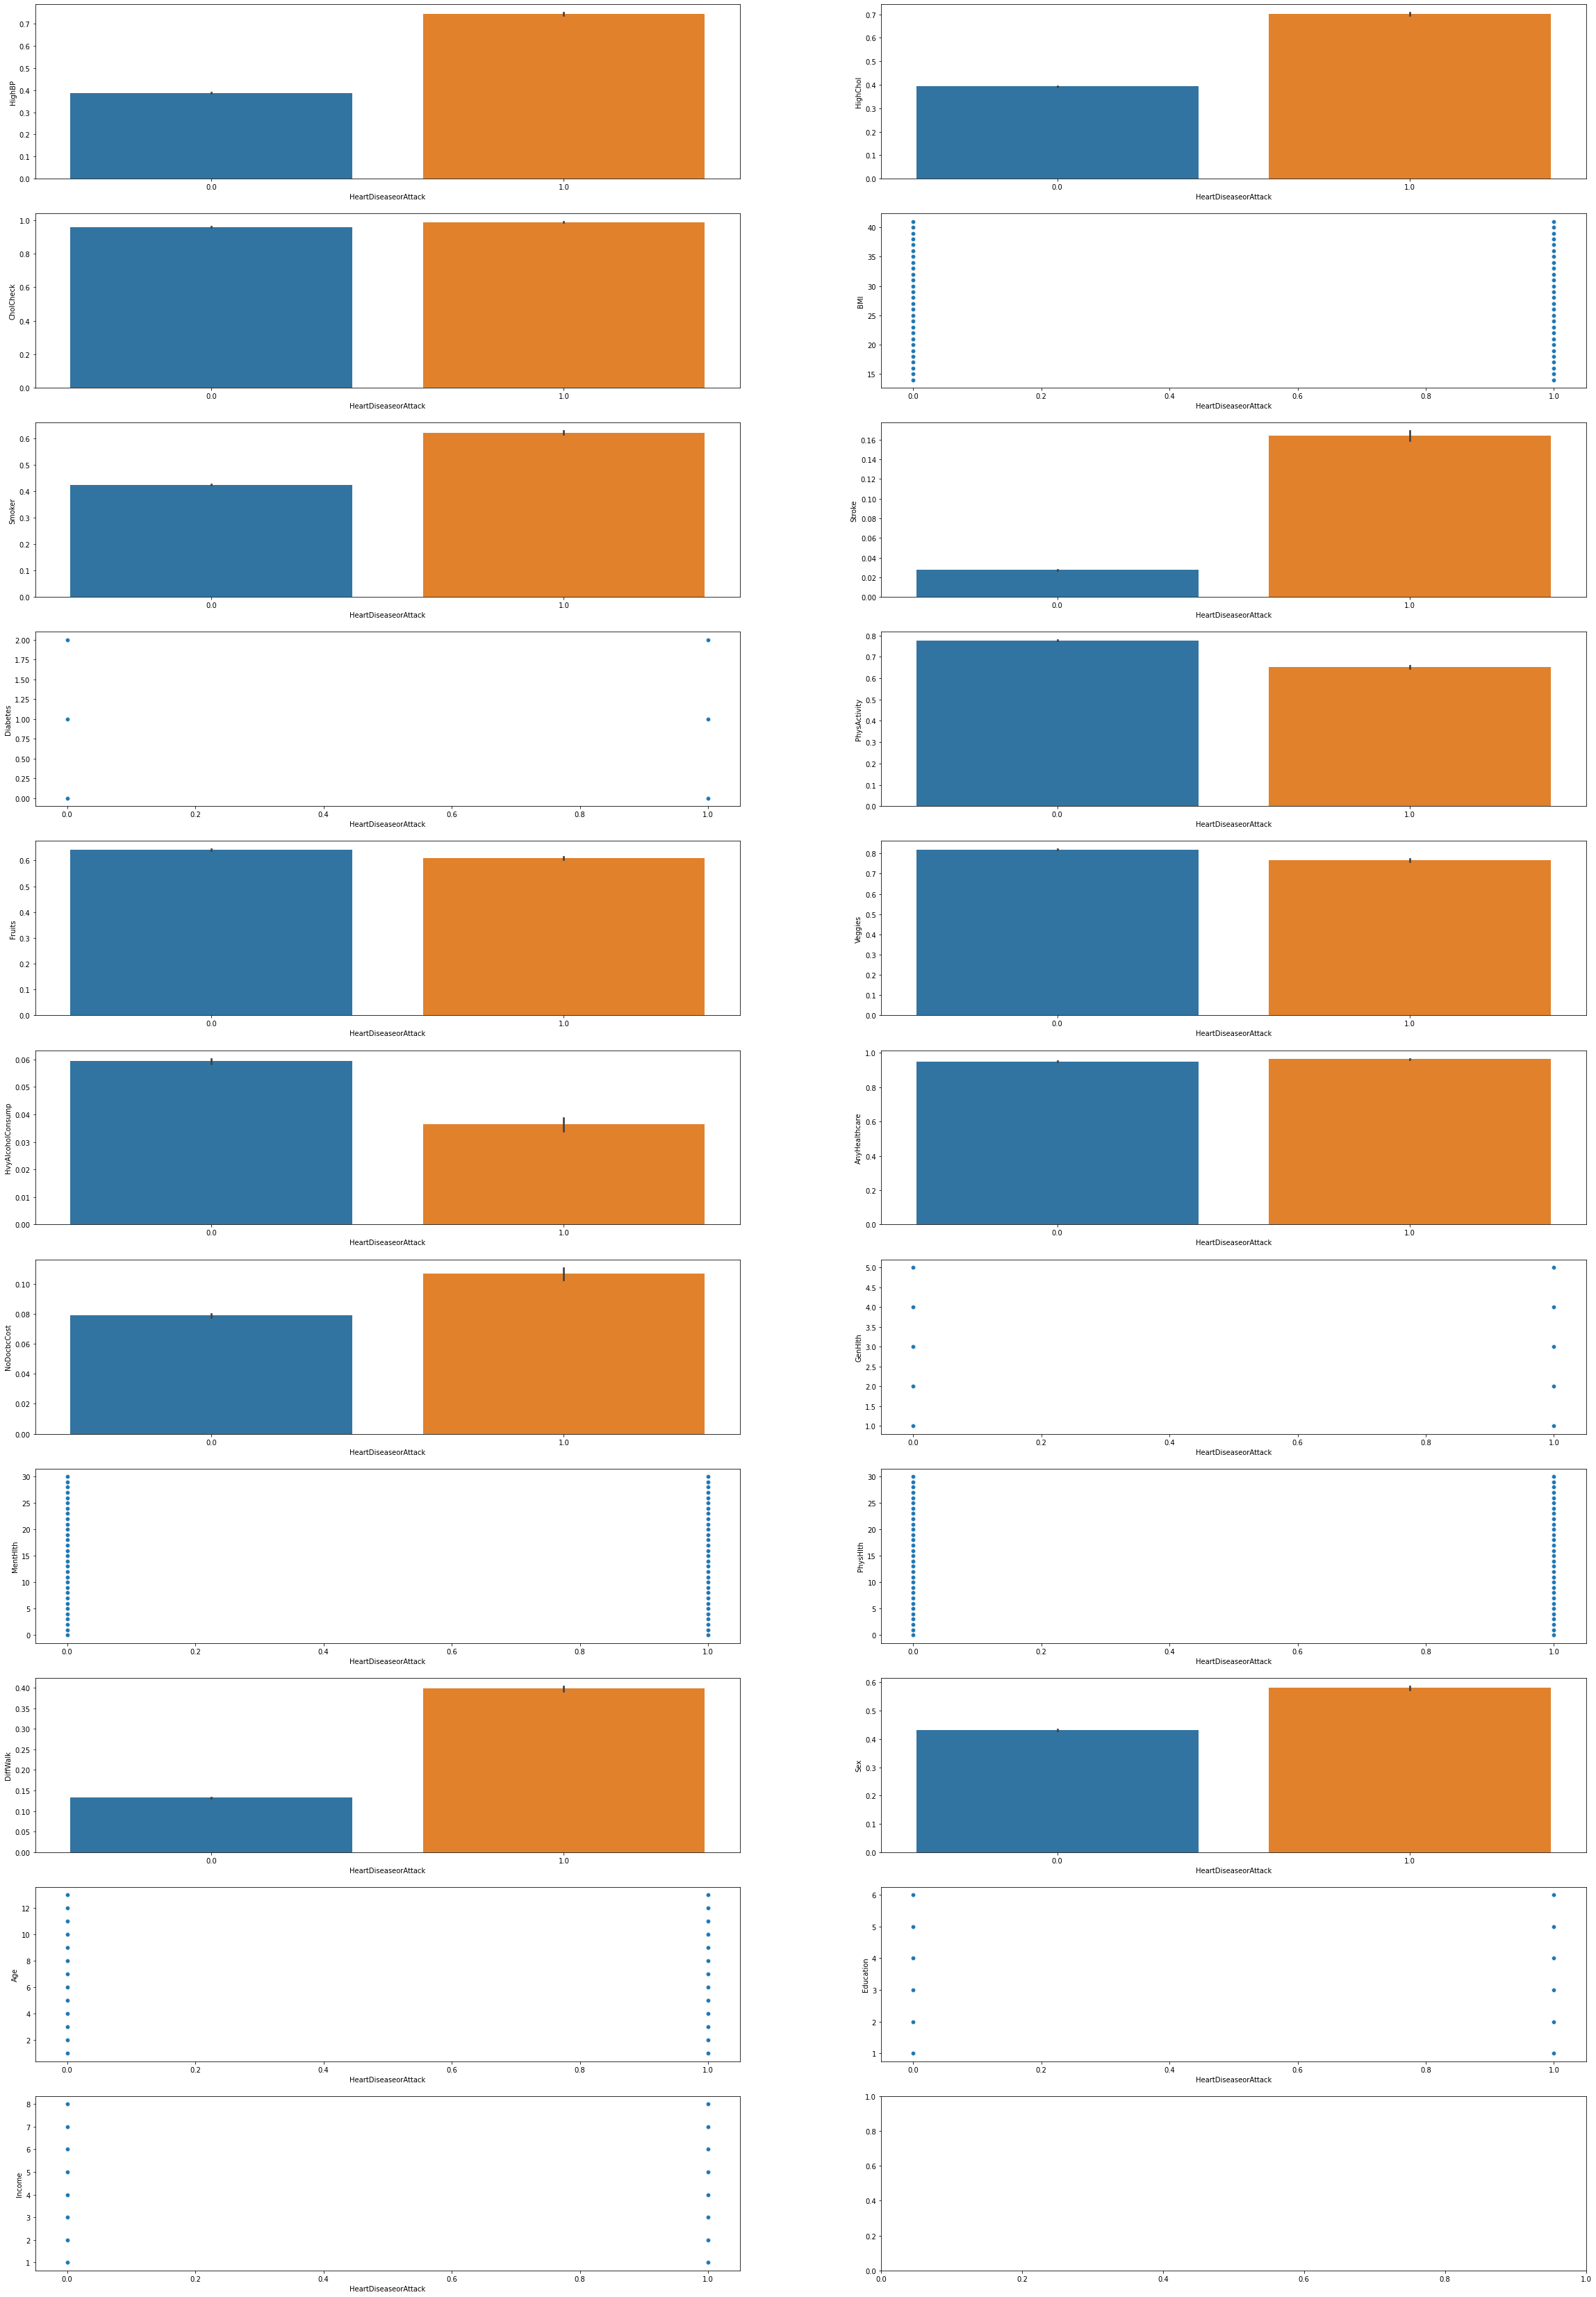

In [19]:
fig,ax=plt.subplots(11,2,figsize = (40,60))
i=0
row = 0
col = 0
for col in data.columns:
  if(col!=target):
    r = int(i/2)
    c = i % 2
    if(helper(col)>2):
      sns.scatterplot(data[target],data[col],ax=ax[r][c])
    if(helper(col)<=2):
      sns.barplot(data[target],data[col],ax=ax[r][c])
    i=i+1
            
plt.show()
            

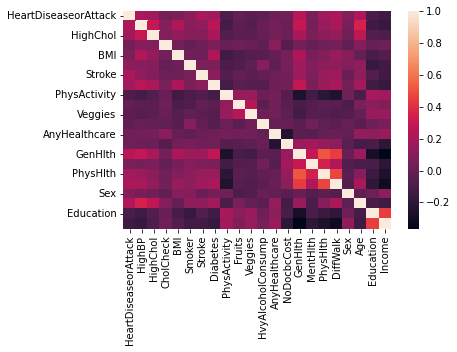

In [20]:
sns.heatmap(data.corr())

In [21]:
correlation_matrix=data.corr()
correlation_matrix.iloc[0,:]

HeartDiseaseorAttack    1.000000
HighBP                  0.210028
HighChol                0.180948
CholCheck               0.044471
BMI                     0.059427
Smoker                  0.115071
Stroke                  0.202358
Diabetes                0.179471
PhysActivity           -0.085669
Fruits                 -0.019103
Veggies                -0.038839
HvyAlcoholConsump      -0.028775
AnyHealthcare           0.018784
NoDocbcCost             0.029774
GenHlth                 0.259346
MentHlth                0.062080
PhysHlth                0.179894
DiffWalk                0.212310
Sex                     0.087377
Age                     0.223664
Education              -0.099331
Income                 -0.139498
Name: HeartDiseaseorAttack, dtype: float64

In [22]:
correlation_target=correlation_matrix.iloc[0,:]
correlation_target=dict(correlation_target)
correlation_target

{'HeartDiseaseorAttack': 1.0,
 'HighBP': 0.21002834835397777,
 'HighChol': 0.1809480537724005,
 'CholCheck': 0.044470924746625735,
 'BMI': 0.059427065026406246,
 'Smoker': 0.11507143733608964,
 'Stroke': 0.20235841997251933,
 'Diabetes': 0.17947119438501202,
 'PhysActivity': -0.08566855164323967,
 'Fruits': -0.019103037011940476,
 'Veggies': -0.038839223457698864,
 'HvyAlcoholConsump': -0.028775448193560767,
 'AnyHealthcare': 0.018784103682673907,
 'NoDocbcCost': 0.029774418128805016,
 'GenHlth': 0.2593458537986838,
 'MentHlth': 0.062080155151269446,
 'PhysHlth': 0.1798940343188655,
 'DiffWalk': 0.21231004004546283,
 'Sex': 0.08737716676554416,
 'Age': 0.22366387850999056,
 'Education': -0.09933106087541833,
 'Income': -0.13949829116006715}

In [23]:
cols=list(data.columns)

In [24]:
# Select the top k features
k = 10 # Let's say we start with 10
predictors=[col for col in cols if col!=target]
X=data[predictors]
y=data[target]
chi2_scores, p_values = chi2(X, y)
top_k_indices = chi2_scores.argsort()[-k:][::-1]

# Print the top k features
print(f'Top {k} features:')
for i in top_k_indices:
    print(f'Feature {i} - {cols[i]}: {chi2_scores[i]}')

Top 10 features:
Feature 15 - MentHlth: 141675.20244358684
Feature 14 - GenHlth: 16188.368845589546
Feature 18 - Sex: 14205.454480177166
Feature 6 - Stroke: 13008.732769847016
Feature 5 - Smoker: 9584.097097809921
Feature 16 - PhysHlth: 9266.09130050449
Feature 13 - NoDocbcCost: 7416.897230372131
Feature 0 - HeartDiseaseorAttack: 6236.938434700895
Feature 1 - HighBP: 4614.325245056894
Feature 20 - Education: 3287.3901890544007


In [25]:
# These are all the Predictor Variables! After conparing both the Chi-square and coorelation matrix, as Chi-Square can only help us understand if the features are  similar but it cannot really quantify the similarity.
columns_important=['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'PhysHlth','DiffWalk', 'Age']

In [26]:
X=data[columns_important]
y=data['HeartDiseaseorAttack']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=14628513)

In [28]:
x_train.shape

(195066, 9)

In [29]:
y_train.shape

(195066,)

In [30]:
# Performing the PCA: For reducing the Dimensionality reduction:
# First we need to scale the data to perform the PCA: So, we will be using standered scaler!

#Scaling Data - Standard Sclaer before PCA
scaler_heart_data = StandardScaler()
scaler_heart_data.fit(x_train)
x_train_PCA = scaler_heart_data.transform(x_train)
x_test_PCA = scaler_heart_data.transform(x_test)

In [31]:
# Performing the PCA Step after the standered scaling part:
pca = PCA(n_components=0.8)
pca.fit(x_train_PCA)
len(pca.components_)
x_train_std_pca = pca.transform(x_train_PCA)
x_test_std_pca = pca.transform(x_test_PCA)

In [32]:
x_train_std_pca

array([[-0.53727703,  0.97631042, -1.23518594, -0.12035883,  0.39218475,
        -0.16054282],
       [ 0.17871151, -0.97899872,  0.85004265, -0.30223464, -0.55609186,
         0.9624549 ],
       [ 2.2347245 ,  1.94998234,  0.88132711, -0.61343428, -2.03491989,
         0.71721283],
       ...,
       [ 1.13338261,  0.27805907, -1.08016888, -0.3396818 , -0.19000395,
        -0.92135748],
       [-0.63541862, -0.0627344 ,  0.47343651,  0.16548094, -0.64961742,
        -1.02700745],
       [ 0.64602781, -1.1191026 , -1.0746659 , -0.35287759, -0.13532259,
         0.8298431 ]])

In [33]:
#Oversampling data:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x_train, y_train)
x_oversampled_pca, y_oversampled_pca = oversample.fit_resample(x_train_std_pca, y_train)

In [34]:
x_oversampled_pca

array([[-0.53727703,  0.97631042, -1.23518594, -0.12035883,  0.39218475,
        -0.16054282],
       [ 0.17871151, -0.97899872,  0.85004265, -0.30223464, -0.55609186,
         0.9624549 ],
       [ 2.2347245 ,  1.94998234,  0.88132711, -0.61343428, -2.03491989,
         0.71721283],
       ...,
       [-0.30047239, -0.42721621,  0.61862729, -0.15692905, -0.65931326,
         1.07928386],
       [ 3.296846  , -1.71092881, -0.04906383,  4.02166735,  2.38862016,
         0.44605077],
       [ 2.4633945 , -0.5389802 , -0.7866697 ,  4.36056521,  0.47669712,
         1.40696846]])

### Logistic Regression Algorithm:

In [35]:
clf_non = LogisticRegression(solver='liblinear')
clf_non.fit(x_train,y_train)
print(f'Train Data Score: {f1_score(clf_non.predict(x_train),y_train)}')
print(f'Test Data Score: {f1_score(clf_non.predict(x_test),y_test)}')

Train Data Score: 0.18030755106724813
Test Data Score: 0.19105243857719106


This will be the results for Data without PCA:

In [36]:
prediction = clf_non.predict(x_test)
print(classification_report(y_test, prediction))
score = clf_non.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     44254
         1.0       0.55      0.12      0.19      4513

    accuracy                           0.91     48767
   macro avg       0.74      0.55      0.57     48767
weighted avg       0.88      0.91      0.88     48767

0.9095289847642873


The following will be the results with PCA:



In [37]:
clf_pca = LogisticRegression(solver='liblinear')
clf_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.390026541643257
Test Data Score: 0.3962729092869244


In [38]:
prediction = clf_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = clf_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     44254
         1.0       0.30      0.57      0.40      4513

    accuracy                           0.84     48767
   macro avg       0.63      0.72      0.65     48767
weighted avg       0.89      0.84      0.86     48767

0.839235548629196


### Decision Tree Classifier Algorithm:

In [39]:
clf_non_tree = DecisionTreeClassifier()
clf_non_tree.fit(x_train,y_train)
print(f'Train Data Score: {f1_score(clf_non_tree.predict(x_train),y_train)}')
print(f'Test Data Score: {f1_score(clf_non_tree.predict(x_test),y_test)}')

Train Data Score: 0.3574281664733926
Test Data Score: 0.1863041289023162


In [40]:
prediction = clf_non_tree.predict(x_test)
print(classification_report(y_test, prediction))
score = clf_non_tree.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     44254
         1.0       0.38      0.12      0.19      4513

    accuracy                           0.90     48767
   macro avg       0.65      0.55      0.57     48767
weighted avg       0.87      0.90      0.88     48767

0.9005885127237682


This will be the results for Data With PCA:

In [41]:
clf_tree_pca = DecisionTreeClassifier()
clf_tree_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_tree_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_tree_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.4847895329099198
Test Data Score: 0.36098603373273297


In [42]:
prediction = clf_tree_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = clf_tree_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     44254
         1.0       0.28      0.52      0.36      4513

    accuracy                           0.83     48767
   macro avg       0.61      0.69      0.63     48767
weighted avg       0.88      0.83      0.85     48767

0.8283060266163594


### Random Forest Classifier:

In [43]:
clf_forest_non = RandomForestClassifier()
clf_forest_non.fit(x_train,y_train)
print(f'Test Score - {f1_score(clf_forest_non.predict(x_test),y_test)}')
print(f'Train Score - {f1_score(clf_forest_non.predict(x_train),y_train)}')

Test Score - 0.20070363544982409
Train Score - 0.38008037452873183


In [44]:
prediction = clf_forest_non.predict(x_test)
print(classification_report(y_test, prediction))
score = clf_forest_non.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     44254
         1.0       0.41      0.13      0.20      4513

    accuracy                           0.90     48767
   macro avg       0.66      0.56      0.57     48767
weighted avg       0.87      0.90      0.88     48767

0.9021674492997314


This will be the results with PCA:

In [45]:
clf_forest_pca = RandomForestClassifier()
clf_forest_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_forest_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_forest_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.48311756637417574
Test Data Score: 0.3633594761288358


In [47]:
prediction = clf_forest_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = clf_forest_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     44254
         1.0       0.28      0.53      0.36      4513

    accuracy                           0.83     48767
   macro avg       0.61      0.69      0.63     48767
weighted avg       0.88      0.83      0.85     48767

0.8285520946541719


### XG Boost Algorithm:

In [48]:
model = XGBClassifier(eval_metric='auc',scale_pos_weight = (y_over.shape[0] / y.sum())-1)
model.fit(x_train, y_train)
print(f'Train Data Score: {f1_score(model.predict(x_train),y_train)}')
print(f'Test Data Score: {f1_score(model.predict(x_test),y_test)}')

Train Data Score: 0.3465830405273941
Test Data Score: 0.34666787889808165


In [49]:
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))
score = model.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     44254
         1.0       0.22      0.84      0.35      4513

    accuracy                           0.71     48767
   macro avg       0.60      0.77      0.58     48767
weighted avg       0.91      0.71      0.77     48767

0.7052925133799496


This will be the results with PCA:

In [50]:
model_pca = RandomForestClassifier()
model_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_forest_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_forest_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.48311756637417574
Test Data Score: 0.3633594761288358


In [51]:
prediction = model_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = model_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     44254
         1.0       0.28      0.53      0.36      4513

    accuracy                           0.83     48767
   macro avg       0.61      0.69      0.63     48767
weighted avg       0.88      0.83      0.85     48767

0.8283880492956303


As we can see that in most of the cases except the XG Boost, we can see that the algorithms performs much better in all of the above 
Cases which is done without PCA which also includes working with Oversampling of the data.

Performing Hyper Parameter Tuning For Logistic Regression:




Beta: [[0.54559264 0.58305327 0.45105846 0.90408623 0.17786236 0.51232519
  0.00208942 0.2210021  0.24481167]]
Params {'C': 0.01}
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     44254
         1.0       0.55      0.11      0.18      4513

    accuracy                           0.91     48767
   macro avg       0.73      0.55      0.57     48767
weighted avg       0.88      0.91      0.88     48767

Score: 0.9094059507453811
[0.         0.00894834 1.        ] [0.         0.10879681 1.        ] [2. 1. 0.]


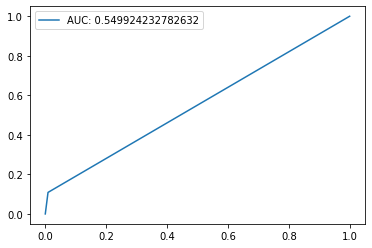

In [52]:
parameters = {'C':[0.001, 0.01, 0.1, 1]}
regression_cv = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5)
regression_cv.fit(x_train, y_train)
lr = LogisticRegression(C = regression_cv.best_params_['C'])
lr.fit(x_train, y_train)

# Beta:
print("Beta:", lr.coef_)

# Parameters:
print("Params", regression_cv.best_params_)

prediction = lr.predict(x_test)
print(classification_report(y_test, prediction))
score = lr.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)
print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

Hyper Parameter Tuning For Decision Tree Classifier:

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     44254
         1.0       0.60      0.04      0.08      4513

    accuracy                           0.91     48767
   macro avg       0.76      0.52      0.52     48767
weighted avg       0.88      0.91      0.87     48767

Score: 0.9087497693112145
[0.        0.0028698 1.       ] [0.        0.0421006 1.       ] [2. 1. 0.]


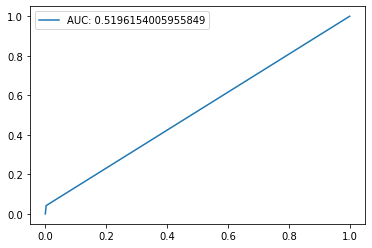

In [53]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5]
}

# Create the classifier
clf = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train a new classifier with the best combination of hyperparameters
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)
print(classification_report(y_test, prediction))

score = clf.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)

print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

Hyper Parameter Tuning For Random Forest Classifier:


{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 5}
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     44254
         1.0       0.61      0.03      0.05      4513

    accuracy                           0.91     48767
   macro avg       0.76      0.51      0.50     48767
weighted avg       0.88      0.91      0.87     48767

Score: 0.9084011729243135
[0.         0.00183034 1.        ] [0.         0.02814093 1.        ] [2. 1. 0.]


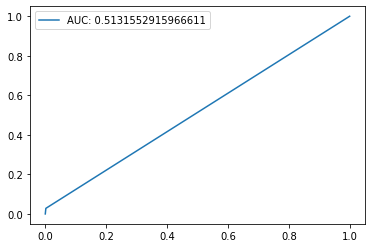

In [54]:
param_grid = {
    'n_estimators': [5,10],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

# Create the classifier
clf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train a new classifier with the best combination of hyperparameters
clf_r = RandomForestClassifier(**best_params)
clf_r.fit(x_train, y_train)


prediction = clf_r.predict(x_test)
print(classification_report(y_test, prediction))

score = clf_r.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)

print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

Hyper Parameter Tuning For XGBoost:


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     44254
         1.0       0.59      0.09      0.16      4513

    accuracy                           0.91     48767
   macro avg       0.75      0.54      0.55     48767
weighted avg       0.88      0.91      0.88     48767

Score: 0.9084011729243135
[0.         0.00183034 1.        ] [0.         0.02814093 1.        ] [2. 1. 0.]


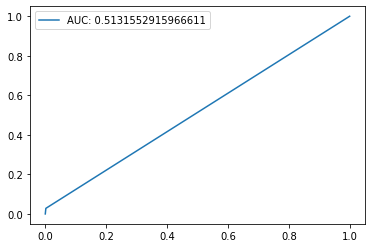

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the range of values for each hyperparameter
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100]
}

# Create the XGBoost model
model = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameter values
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))

score = clf_r.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)

print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

### Performing Clustering using K-Means Algorithm and also performing the Hyper Paramater Tuning using Grid Search CV:

In [56]:
data_same=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [57]:
data_same.shape[0]

253680

In [58]:
train_size=0.8*253680
test_size=0.2*253680

In [59]:
train_size

202944.0

In [60]:
train_data=data_same.iloc[:202944,:]
test_data=data_same.iloc[202944:,:]

In [61]:
# Define the range of values for the hyperparameter n_clusters
param_grid = {'n_clusters': range(2, 7)}

# Create the K-means model
model = KMeans()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(train_data)

# Print the best hyperparameter value
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(test_data)

{'n_clusters': 6}
